In [164]:
#import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [165]:
#dictionaries of assigned teams with URLS
athletic_teams = {
    
    'mens_volleyball' : ['https://ccnyathletics.com/sports/mens-volleyball/roster/2022', 'https://lehmanathletics.com/sports/mens-volleyball/roster', 'https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster', 
                         'https://johnjayathletics.com/sports/mens-volleyball/roster', 'https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster', 'https://mecathletics.com/sports/mens-volleyball/roster', 
                         'https://www.huntercollegeathletics.com/sports/mens-volleyball/roster', 'https://yorkathletics.com/sports/mens-volleyball/roster', 'https://ballstatesports.com/sports/mens-volleyball/roster'], 
   
    'womens_volleyball' : ['https://bmccathletics.com/sports/womens-volleyball/roster', 'https://yorkathletics.com/sports/womens-volleyball/roster', 'https://hostosathletics.com/sports/womens-volleyball/roster', 
                           'https://bronxbroncos.com/sports/womens-volleyball/roster/2021', 'https://queensknights.com/sports/womens-volleyball/roster', 'https://augustajags.com/sports/wvball/roster', 
                           'https://flaglerathletics.com/sports/womens-volleyball/roster', 'https://pacersports.com/sports/womens-volleyball/roster', 'https://www.golhu.com/sports/womens-volleyball/roster'],
                  
    'mens_swimming_and_diving' : ['https://csidolphins.com/sports/mens-swimming-and-diving/roster', 'https://yorkathletics.com/sports/mens-swimming-and-diving/roster', 'https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster',
                                  'https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster', 'https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster', 'https://mckbearcats.com/sports/mens-swimming-and-diving/roster',
                                  'https://ramapoathletics.com/sports/mens-swimming-and-diving/roster', 'https://oneontaathletics.com/sports/mens-swimming-and-diving/roster', 'https://bubearcats.com/sports/mens-swimming-and-diving/roster/2021-22', 'https://albrightathletics.com/sports/mens-swimming-and-diving/roster'],
    
    
    'womens_swimming_and_diving' : ['https://csidolphins.com/sports/womens-swimming-and-diving/roster', 'https://queensknights.com/sports/womens-swimming-and-diving/roster', 'https://yorkathletics.com/sports/womens-swimming-and-diving/roster', 
                                    'https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?path=wswim', 'https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster', 'https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster',
                                    'https://mckbearcats.com/sports/womens-swimming-and-diving/roster', 'https://ramapoathletics.com/sports/womens-swimming-and-diving/roster', 'https://keanathletics.com/sports/womens-swimming-and-diving/roster', 'https://oneontaathletics.com/sports/womens-swimming-and-diving/roster']
}

In [174]:
#Function for scraping names and heights from raw HTML into Python using BeautifulSoup
def scraped_data(team_type, urls):
  #Lists to contain raw data of each athlete name and height 
  athlete_names = []
  athlete_heights = []

  for url in urls:
    page = requests.get(url)

    #importing the raw html data 
    soup = BeautifulSoup(page.content, 'html.parser')
 
    #collect td tags with  class of height into list  
    scraped_heights = soup.find_all('td', class_ = 'height')
  
    #collect td tags with  class of names into list
    scraped_names = soup.find_all('td', class_ ='sidearm-table-player-name ')

    for name in scraped_names:
      athlete_names.append(name.get_text().strip())

    
    for height in scraped_heights:

      x = height.get_text()
      

      #To account for any missing heights 
      if x == '-':
        athlete_heights.append(x)
        continue 

      #convert raw height to inches 
      feet = float(x.split('-')[0]) * 12
      inches = float(x.split('-')[1])

      total = feet + inches 

      athlete_heights.append(total)

    #Build average height algorithm
    #total height in the list without '-' 
    total_height = 0 
    for z in range(0, len(athlete_heights)):
      if athlete_heights[z] != '-':
        total_height += athlete_heights[z]

    #Compute average height 
    average_height = total_height / len(athlete_heights)

    # replace any '-' with  average height
    for x in range(0, len(athlete_heights)):
      if athlete_heights[x] == '-':
        athlete_heights[x] = average_height
    
   #Build dataframe 
  filename = team_type + '.csv'
  df = pd.DataFrame()
  df['name'] = athlete_names
  df['height'] = athlete_heights
  df.to_csv(filename, index=False)
  df.to_csv('mens_volleyball.csv',index=False)
  df.to_csv('womens_volleyball',index=False)
  df.to_csv('mens_swimming_and_diving', index=False)
  df.to_csv('womens_swimming_and_diving',index=False)
  return df




In [120]:
#Use function to assign data into dataframe
mens_volleyball_df = scraped_data('mens_volleyball', athletic_teams['mens_volleyball'])
womens_volleyball_df = scraped_data('womens_volleyball', athletic_teams['womens_volleyball'])
mens_swimming_and_diving_df =scraped_data('mens_swimming_and_diving', athletic_teams['mens_swimming_and_diving'])
womens_swimming_and_diving_df =scraped_data('womens_swimming_and_diving', athletic_teams['womens_swimming_and_diving'])

In [125]:
#DF for mens volleyball player and height
mens_volleyball_df

,name,height
0,Jeffrey Celis,69.0
1,Reng Chen,69.0
2,Edwin Fierros Gaytan,68.0
3,Fred De La Cuadra,70.0
4,Utpal Chand,69.0
...,...,...
105,Brandon Shepherd,74.0
106,Kevin Doran,79.0
107,Sammy Adkisson,69.0
108,Lucas Biondi,78.0


In [126]:
#DF for womens volleyball player and height
womens_volleyball_df

,name,height
0,Jaylina Kraker,59.0
1,Kaylin Nieves,62.0
2,Alyssa Duran,65.0
3,Vielka De Jesus Segura,67.0
4,Nolverys Fernandez,65.0
...,...,...
109,Hannah Lingold,70.0
110,Meghan Tennant,75.0
111,Samantha Arens-Ennis,65.0
112,Krystal Heffelfinger,71.0


In [127]:
#DF for mens swimming player and height
mens_swimming_and_diving_df

,name,height
0,Daniel Angulo,63.916667
1,Anthony Attenborough,70.000000
2,Charles Cusumano,64.000000
3,Eslam Hussein,70.000000
4,Chris Ivanov,75.000000
...,...,...
166,Kieran Hassard,72.000000
167,Anthony Laite,69.000000
168,Drew MacDonald,72.000000
169,Kyle Morken,73.000000


In [128]:
#DF for womens swimming player and height
womens_swimming_and_diving_df

,name,height
0,Kathleen Bridgman,65.000000
1,Angye Galan,43.777778
2,Jessica Johnson,68.000000
3,Macy Jones-Busch,43.777778
4,Bridget Mulvey,67.000000
...,...,...
140,Paige Splendido,65.000000
141,Emma Stephenson,67.000000
142,Callie Stinson,64.000000
143,Jessie Triller,62.000000


In [129]:
# Sort the 5 tallest Male Volleyball players 
print("Tallest Male Volleyball Players")
mens_volleyball_df.nlargest(n=5, columns = ['height'], )

Tallest Male Volleyball Players


,name,height
100,Mark Wickstrom,81.0
102,Will Hippe,80.0
58,Akil Vaughn,79.0
98,Angelos Mandilaris,79.0
106,Kevin Doran,79.0


In [130]:
# Sort the 5 shortest Male Volleyball players
print("Shortest Male Volleyball Players")
mens_volleyball_df.nsmallest(n=5, columns = ['height'], )

Shortest Male Volleyball Players


,name,height
11,Juan Lemus,63.0
35,Bryce Glasper,64.0
23,Darren Roach,66.0
67,Bryan Eng,66.0
69,Andrew Reza,66.0


In [131]:
# Sort the 5 tallest Female Volleyball players
print("Tallest Female Volleyball Players")
womens_volleyball_df.nlargest(n=5, columns = ['height'], )

Tallest Female Volleyball Players


,name,height
75,Molly Boyd,75.0
107,Alyssa Daley,75.0
110,Meghan Tennant,75.0
71,Logan Garcia,74.0
73,McKenzie Eaves,74.0


In [132]:
# Sort the 5 shortest Female Volleyball players
print("Shortest Female Volleyball Players ")
womens_volleyball_df.nsmallest(n=5, columns = ['height'], )

Shortest Female Volleyball Players 


,name,height
0,Jaylina Kraker,59.0
20,Yeralkis Gomez,59.0
32,Kenndy Vasquez,59.0
14,Kiara Gonzalez,60.0
23,Ariana Serrano,60.0


In [133]:
# Sort the 5 tallest Male Swimmers
print("Tallest Male Swimmers")
mens_swimming_and_diving_df.nlargest(n=5, columns = ['height'], )

Tallest Male Swimmers


,name,height
79,Colton Grimes,78.0
113,Josh Templeton,78.0
20,Kasper Gacek,77.0
42,Jerry Brown,77.0
54,Zach Linder,77.0


In [134]:
# Sort the 5 shortest Male Swimmers
print("Shortest Male Swimmers")
mens_swimming_and_diving_df.nsmallest(n=5, columns = ['height'], )

Shortest Male Swimmers


,name,height
0,Daniel Angulo,63.916667
2,Charles Cusumano,64.000000
35,Eric Li,64.000000
36,Joseph Scarpetta,65.000000
103,Samuel De Leon,65.000000


In [135]:
# Sort the 5 tallest Female Volleyball players
print("Tallest Female Swimmers")
womens_swimming_and_diving_df.nlargest(n=5, columns = ['height'], )

Tallest Female Swimmers


,name,height
45,Kamilla Shulanova,72.0
55,Isabella Gable,71.0
86,Claire Brouillet,71.0
89,Hallie Dixon,71.0
94,Presley Heitzmann,71.0


In [144]:
# Sort the 5 shortest Female swimmers 
print("Shortest Female Swimmers")
womens_swimming_and_diving_df.nsmallest(n=5, columns = ['height'], )

Shortest Female Swimmers


,name,height
1,Angye Galan,43.777778
3,Macy Jones-Busch,43.777778
7,Kolleen Rodriguez,43.777778
9,Rupakshi Aggarwal,55.301587
12,Claudia Cimino,55.301587


In [145]:
#dictionary with the avg height of each team 
avg_male_volleyball_player= mens_volleyball_df['height'].mean()
avg_female_volleyball_player= womens_volleyball_df['height'].mean()
avg_male_swimmer = mens_swimming_and_diving_df['height'].mean()
avg_female_swimmer = womens_swimming_and_diving_df['height'].mean()

average_heights = pd.DataFrame({ 'Teams': ['mens swim', 'womens swim','mens v-ball','womens v-ball'],
                        'Average height': [avg_male_volleyball_player,avg_female_volleyball_player,avg_male_swimmer ,avg_female_swimmer  ]})

In [147]:
average_heights

,Teams,Average height
0,mens swim,72.054545
1,womens swim,67.157895
2,mens v-ball,71.533818
3,womens v-ball,65.103010


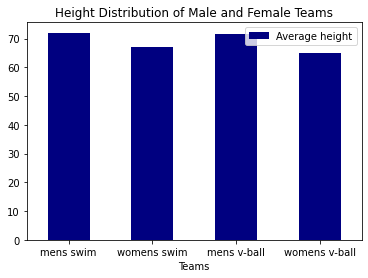

In [161]:
#Visualize height distribution
average_heights.plot.bar(x ='Teams', y = 'Average height', rot= 0, title ='Height Distribution of Male and Female Teams',color="navy")
